In [1]:
# para rodar no colab
#!pip uninstall networkx -y
#!pip install networkx==2.3
import networkx
networkx.__version__

'2.3'

In [9]:
#Adicionando biblioteca "nx@networkx" para gerenciamento e produção de graficos 
import networkx as nx
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.cm as cm
import math as mt
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import random
import warnings
import networkx.algorithms.community as nx_comm
import os as os
from scipy.linalg import expm
from scipy.stats import moment
from scipy.stats import entropy
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from networkx.algorithms import community
from networkx.algorithms.community import LFR_benchmark_graph
from sklearn.metrics import normalized_mutual_info_score
from networkx.algorithms.community import greedy_modularity_communities
from networkx.algorithms.community import label_propagation_communities
#from community import community_louvain
#from google.colab import drive

warnings.filterwarnings('ignore')
np.random.seed(50)
#drive.mount('/content/drive/')
#definindo dimesões padrão para plot
plt.rcParams['figure.figsize'] = (11,7)



In [30]:
def plot_grafo(grafo):
#     plots = nx.spring_layout(grafo)
    pos = nx.fruchterman_reingold_layout(grafo);
    plt.figure(figsize=(8,8));
    plt.axis("off");
    nx.draw_networkx_nodes(grafo, pos, node_size=300, node_color="black");
    nx.draw_networkx_edges(grafo, pos, alpha=0.500);
    nx.draw_networkx_labels(grafo, pos, font_color="white", font_size=9);
#     nx.draw(grafo, with_labels = True, node_size=1, font_size=10, pos = plots)
    plt.show(True)

In [31]:
def plot_grafo_anel(grafo):
    pos = nx.circular_layout(grafo);
    plt.figure(figsize=(8,8));
    plt.axis("off");
    nx.draw_networkx_nodes(grafo, pos, node_size=300, node_color="black");
    nx.draw_networkx_edges(grafo, pos, alpha=0.500);
    nx.draw_networkx_labels(grafo, pos, font_color="white");
    plt.show();

In [32]:
def degree_distribution(G):
    grau = dict(G.degree()) # dicionario (nó , grau)
    grau = list(grau.values()) # lista formada pelo grau ordenado pelo dicionario, 
    # assim correspondendo ao nó representado em um array manipulável
    grau = np.array(grau)
    maxk = np.max(grau) #maximo e  minimo do array grau
    mink = np.min(grau)
    kvalues= range(0,maxk+1) # interalo possivel de valores
    Pk = np.zeros(maxk+1) # P(k) Vetor de zeros para armazenar a distribuição
    for k in grau:
        Pk[k] = Pk[k] + 1 # Contabiliza a incidencia dos graus presentes no vetor
    soma = 0
    for i in range(len(Pk)):
        soma = soma + Pk[i] # Divide todos os elementos de Pk, pela somatoria dos graus
    Pk = Pk/soma # Divide todos os elementos de Pk, pela somatoria dos graus
    # caracterizando a distribuição da probabilidade de um grau,
           
    return kvalues,Pk,grau

In [33]:
def plog_histograma(grau):
    maxk = np.max(grau)
    plt.hist(grau, bins  = maxk, density=True)
    plt.xlabel('k', fontsize=20)
    plt.ylabel('Probabilidade', fontsize=20)
    plt.title("Histograma de P(k)", fontsize=20)
    plt.show()

In [34]:
def plog_scatter(k,pk):
    plt.xlabel('k')
    plt.ylabel('Degree')
    plt.title("Dispersão Grau k")
    plt.scatter(k, pk, s=100)

In [35]:
def plog_scatter_log_log(ks,pk):    
    plt.figure()
    plt.loglog(ks,pk,'bo',basex=10,basey=10)
    plt.xlabel("k", fontsize=20)
    plt.ylabel("P(k)", fontsize=20)
    plt.title("Degree distribution", fontsize=20)
    plt.grid(True)
    plt.show(True)

## Questão1 

In [8]:
def means(redes):
    medidas = []
    media = []
    for i in range(len(redes)):
        for j in range(len(redes[i])):
            media.append(np.mean(redes[i][j]))
        medidas.append(np.mean(media))
        media = []
    return medidas

In [9]:
def standard_deviation(redes):
    medidas = []
    devio = []
    for i in range(len(redes)):
        for j in range(len(redes[i])):
            devio.append(np.mean(redes[i][j]))
        medidas.append(np.std(devio))
        devio = []
    return medidas

In [10]:
# função obtem e armazena o numero de arrstas das redes
def number_nodes(G):
    #numero de arrestas em nas redes
    medida = []
    for i in range(30):
        medida.append(len(G[i]))
    return medida

In [11]:
# função obtem e armazena o numero de arrstas das redes
def number_edges(G):
    #numero de arrestas em nas redes
    medida = []
    for i in range(30):
        medida.append(G[i].number_of_edges())
    return medida

In [12]:
def average_degre(G):
    #Grau médio das redes 
    medida = []
    for i in range(30):
        d = dict(G[i].degree()) #discionario de grau por no
        d = list(d.values()) #passando para lista apenas com os graus
        d = np.mean(d)      #media do grau
        medida.append(d)
    return medida

In [13]:
def second_moment(G):
    #Grau médio das redes 
    
    medida = []   
    for i in range(30):
        d = dict(G[i].degree()) #discionario de grau por no
        degree = list(d.values()) #passando para lista apenas com os graus
        medida.append(moment(degree, moment=2))
    return medida

In [14]:
def transitivity(G):
    #Grau médio das redes 
    
    medida = []   
    for i in range(30):
        medida.append(nx.transitivity(G[i]))
    return medida

In [15]:
def degree_pearson_correlation_coefficient(G):
    #Grau médio das redes 
    
    medida = []   
    for i in range(30):
        medida.append(nx.degree_pearson_correlation_coefficient(G[i]))
    return medida

In [16]:
def average_clustering(G):
    #Grau médio das redes 
    
    medida = []   
    for i in range(30):
        medida.append(nx.average_clustering(G[i]))
    return medida

In [17]:
def average_shortest_path_length(G):
    #Grau médio das redes 
    medida = [] 
    sub_medida = [] 
    for i in range(30):
        if(nx.is_connected(G[i])):
            medida.append(nx.average_shortest_path_length(G[i]))
        else:
            for g in nx.connected_component_subgraphs(G[i]):
                sub_medida.append(nx.average_shortest_path_length(g))
            medida.append(np.mean(sub_medida))
    return medida

In [18]:
RE = []
for i in range(30):# Gerando rede aleatória Erdos-Renyi com os seguintes parametros
    N = 1000 # numero de nos
    av_degree = 10 #Grau médio
    p = av_degree/(N-1) #probabilidade do grau
    #função geradora
    GER = nx.gnp_random_graph(N, p, seed=None, directed=False)
    RE.append(GER)

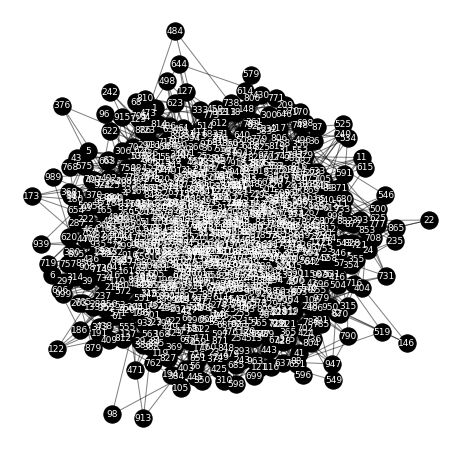

In [19]:
plot_grafo(RE[0])

In [20]:
RE_medidas = []

In [21]:
RE_nodes = number_nodes(RE)
RE_medidas.append(RE_nodes)

In [22]:
RE_edges = number_edges(RE)
RE_medidas.append(RE_edges)

In [23]:
RE_average_degree = average_degre(RE)
RE_medidas.append(RE_average_degree)

In [24]:
RE_second_moment = second_moment(RE)
RE_medidas.append(RE_second_moment)

In [25]:
RE_average_shortest_path_length= average_shortest_path_length(RE)
RE_medidas.append(RE_average_shortest_path_length)

In [26]:
RE_transitivity = transitivity(RE)
RE_medidas.append(RE_transitivity)

In [27]:
RE_average_clustering = average_clustering(RE)
RE_medidas.append(RE_average_clustering)

In [28]:
RE_degree_pearson_correlation_coefficient = degree_pearson_correlation_coefficient(RE)
RE_medidas.append(RE_degree_pearson_correlation_coefficient)

In [29]:
RW = []
for i in range(30):# Gerando rede aleatória Erdos-Renyi com os seguintes parametros
    N = 1000# numero de nós
    av_degree = 10 # grau médio
    k = int(av_degree)# Cada nó está conectado aos k vizinhos mais próximos na topologia em anel
    p = 0.1 #probabilidade de religação
    GWS = nx.watts_strogatz_graph(N, k, p, seed=None)
    RW.append(GWS)

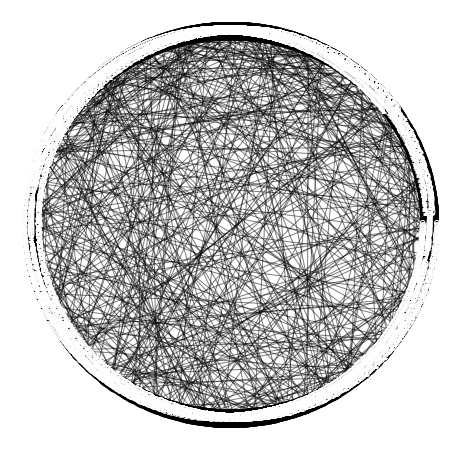

In [30]:
plot_grafo_anel(RW[0])

In [31]:
RW_medidas = []

In [32]:
RW_nodes = number_nodes(RW)
RW_medidas.append(RW_nodes)

In [33]:
RW_edges = number_edges(RW)
RW_medidas.append(RW_edges)

In [34]:
RW_average_degree = average_degre(RW)
RW_medidas.append(RW_average_degree)

In [35]:
RW_second_moment = second_moment(RW)
RW_medidas.append(RW_second_moment)

In [36]:
RW_average_shortest_path_length= average_shortest_path_length(RW)
RW_medidas.append(RW_average_shortest_path_length)

In [37]:
RW_transitivity = transitivity(RW)
RW_medidas.append(RW_transitivity)

In [38]:
RW_average_clustering = average_clustering(RE)
RW_medidas.append(RW_average_clustering)

In [39]:
RW_degree_pearson_correlation_coefficient = degree_pearson_correlation_coefficient(RW)
RW_medidas.append(RW_degree_pearson_correlation_coefficient)

In [40]:
# Gerando rede aleatória  Barabási-Albert  com os seguintes parametros
RA = []

for i in range(30):
    N = 1000 # numero de nos
    av_degree = 10#Grau médio
    m = int(av_degree/2)#probabilidade do grau
    GBA = nx.barabasi_albert_graph(N, m)
    RA.append(GBA)

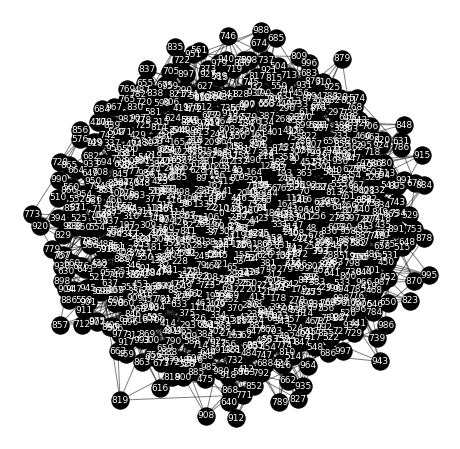

In [41]:
plot_grafo(RA[0])

In [42]:
RA_medidas = []

In [43]:
RA_nodes = number_nodes(RA)
RA_medidas.append(RA_nodes)

In [44]:
RA_edges = number_edges(RA)
RA_medidas.append(RA_edges)

In [45]:
RA_average_degree = average_degre(RA)
RA_medidas.append(RA_average_degree)

In [46]:
RA_second_moment = second_moment(RA)
RA_medidas.append(RA_second_moment)

In [47]:
RA_average_shortest_path_length= average_shortest_path_length(RA)
RA_medidas.append(RA_average_shortest_path_length)

In [48]:
RA_transitivity = transitivity(RA)
RA_medidas.append(RA_transitivity)

In [49]:
RA_average_clustering = average_clustering(RE)
RA_medidas.append(RA_average_clustering)

In [50]:
RA_degree_pearson_correlation_coefficient = degree_pearson_correlation_coefficient(RA)
RA_medidas.append(RA_degree_pearson_correlation_coefficient)

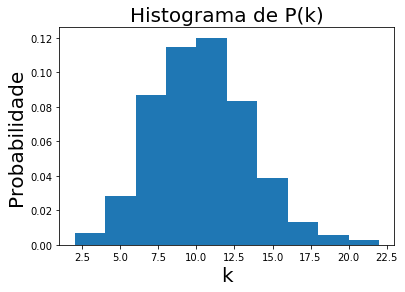

In [51]:
RE_k,RE_pk,RE_grau = degree_distribution(RE[0])
plog_histograma(RE_grau)

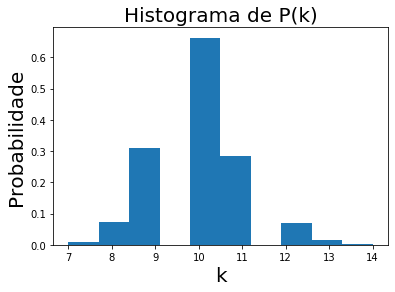

In [52]:
RW_k,RW_pk,RW_grau = degree_distribution(RW[0])
plog_histograma(RW_grau)

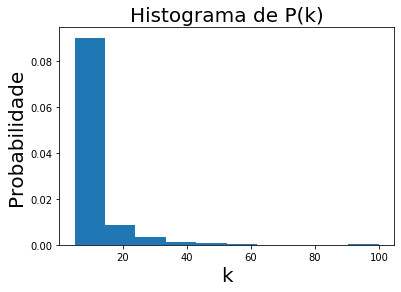

In [53]:
RA_k,RA_pk,RA_grau = degree_distribution(RA[0])
plog_histograma(RA_grau)

In [54]:
RE_media = means(RE_medidas)

In [55]:
RW_media = means(RW_medidas)


In [56]:
RA_media = means(RA_medidas)

In [57]:
RE_std = standard_deviation(RE_medidas)

In [58]:
RW_std = standard_deviation(RW_medidas)


In [59]:
RA_std = standard_deviation(RA_medidas)

In [65]:
RE_medidas = []
RW_medidas = []
RA_medidas = []
for i in range(len(RE_media)):
    RE_medidas.append(RE_media[i])
    RW_medidas.append(RW_media[i])
    RA_medidas.append(RA_media[i])
    RE_medidas.append(RE_std[i])
    RW_medidas.append(RW_std[i])
    RA_medidas.append(RA_std[i])

In [68]:

data = [RE_medidas,RW_medidas,RA_medidas]
colunas = ["Number o nodes","desvio","Number o egdes","desvio","Average degree","desvio","Second moment of degree dist","desvio","Average Shortest path","desvio","Average clustering coefficient","desvio","Transitivity","desvio","Assortativity coefficient","desvio"]
Redes_Random = pd.DataFrame(data, columns=colunas)

In [69]:
Redes_Random # 0 - redes Erdös-Rényi
             # 1 - WattsStrogatz
             # 2 - Barabási-Albert

,Number o nodes,desvio,Number o egdes,desvio,Average degree,desvio,Second moment of degree dist,desvio,Average Shortest path,desvio,Average clustering coefficient,desvio,Transitivity,desvio,Assortativity coefficient,desvio
0,1000.0,0.0,5005.0,77.655221,10.01,1.553104e-01,9.915379,0.450273,3.146556,0.407201,0.010283,0.000786,0.010289,0.000874,-0.005365,0.014524
1,1000.0,0.0,5000.0,0.000000,10.00,0.000000e+00,0.944733,0.049376,4.442019,0.040465,0.483215,0.007144,0.010289,0.000874,-0.010902,0.015279
2,1000.0,0.0,4975.0,0.000000,9.95,1.776357e-15,104.968833,8.222456,2.979600,0.017898,0.030186,0.001345,0.010289,0.000874,-0.054242,0.011723


## Questão 2

In [80]:
def plot_fase(N,AVED,steps):
    S = []
    vk = []
    for c in np.arange(0, AVED, steps):
        p = c/(N-1)
        G = nx.fast_gnp_random_graph(N, p, seed=None, directed=False)
        Gcc=sorted(nx.connected_component_subgraphs(G), key = len, reverse=True)
        G=Gcc[0]
        S.append(len(G)/N)
        vk.append(c)
    plt.figure()
    plt.plot(vk,S,'b', label='Largest component size')
    plt.xlabel("k", fontsize=20)
    plt.ylabel("S", fontsize=20)
    plt.title("Transição de fase do modelo Erdös-Rényi", fontsize=20)
    plt.axvline(x=1, color = 'r')
    plt.grid(True)
    plt.savefig('S.eps') #save the figure into a file
    plt.show();

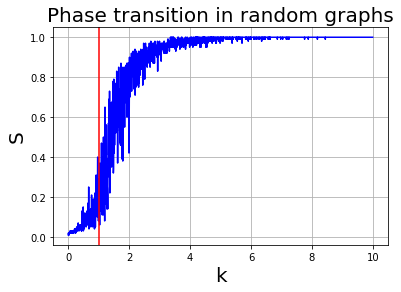

In [83]:
plot_fase(100,10,0.005)

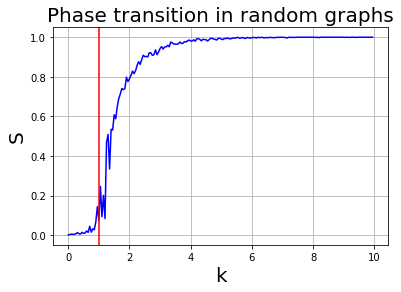

In [85]:
plot_fase(1000,10,0.05)

In [4]:
def plot_small_short_diameter(k):
    vcc = []
    vl = []
    vq = []
    for N in np.arange(100, 1000, 100): #q is the rewiring probability
        G = nx.watts_strogatz_graph(N, k,0.5, seed=None)
        de = dict(G.degree()) #discionario de grau por no
        degree = list(de.values()) #passando para lista apenas com os graus
        d = np.log(N)/np.log(np.mean(degree))
        vcc.append(d)
        l = nx.average_shortest_path_length(G)
        vl.append(l)
        vq.append(N)
    plt.figure()
    plt.plot(vq,np.array(vcc)/vcc[0],'b', label='Diameter')
    plt.plot(vq,np.array(vl)/vl[0],'r', label='Shortest path length')
    plt.xlabel("Nodes", fontsize=20)
    plt.ylabel("Indice", fontsize=20)
    plt.title("Small-world networks tendência", fontsize=20)
    plt.legend()
    plt.grid(True)
    plt.savefig('WS.eps') #save the figure into a file
    plt.show();

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


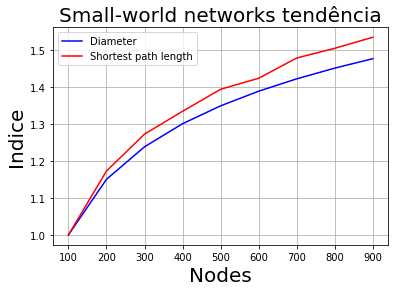

In [5]:
plot_small_short_diameter(4)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


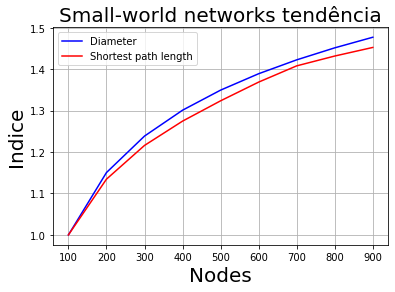

In [6]:
plot_small_short_diameter(10)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


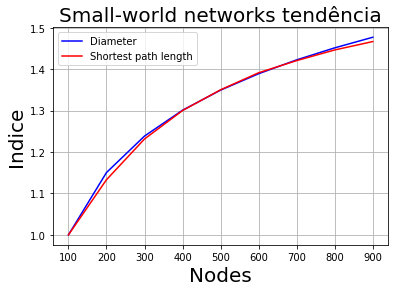

In [7]:
plot_small_short_diameter(20)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


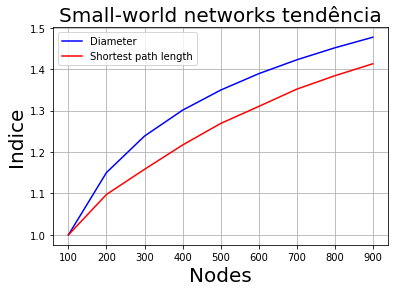

In [8]:
plot_small_short_diameter(30)

## Questão 3


In [92]:
def plot_distancia_clustering():
    N =100
    av_degree = 4
    k = int(av_degree)
    vcc = []
    vl = []
    vq = []
    for q in np.arange(0, 1, 0.01): #q is the rewiring probability
        G = nx.watts_strogatz_graph(N, k, q, seed=None)
        cc = nx.average_clustering(G)
        vcc.append(cc)
        l = nx.average_shortest_path_length(G)
        vl.append(l)
        vq.append(q)
    plt.figure(figsize=(16,9))
    plt.xscale("log");
    plt.plot(vq,np.array(vcc)/vcc[0],'b', label='Clustering')
    plt.plot(vq,np.array(vl)/vl[0],'r', label='Shortest path length')
    plt.xlabel("q", fontsize=20)
    plt.ylabel("$cc/cc_0$, $\ell/\ell_0$", fontsize=20)
    plt.title("Small-world networks", fontsize=20)
    plt.legend()
    plt.grid(True)
    plt.savefig('WS.eps') #save the figure into a file
    plt.show();

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


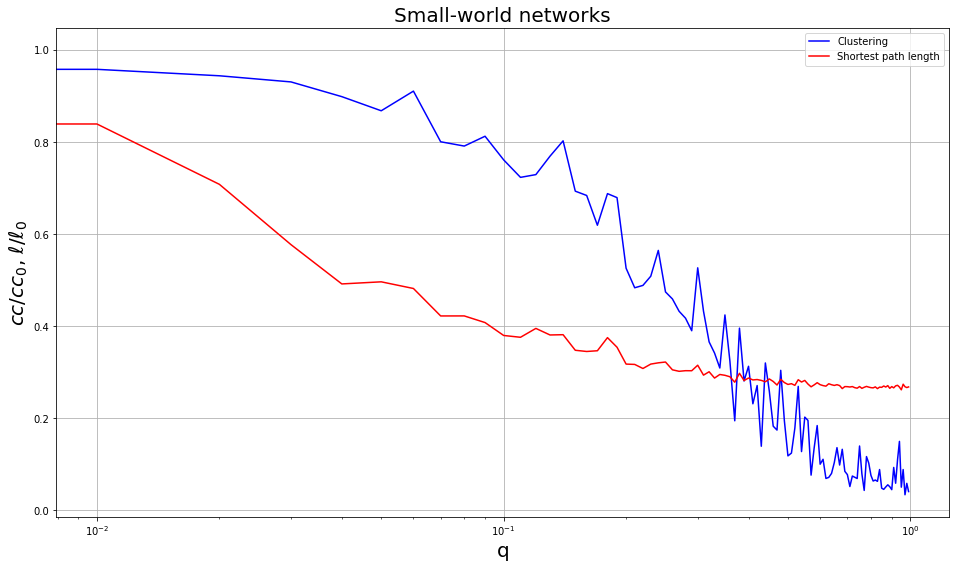

In [93]:
plot_distancia_clustering()

In [21]:
def plot_second_moment_rewiring():
    N =1000
    av_degree = 4
    k = int(av_degree)
    vq = []
    medida = []
    for q in np.arange(0, 1, 0.001): #q is the rewiring probability
        G = nx.watts_strogatz_graph(N, k, q, seed=None)
        d = dict(G.degree()) #discionario de grau por no
        degree = list(d.values()) #passando para lista apenas com os graus
        medida.append(np.mean(moment(degree, moment=2)))
        vq.append(q)
    plt.figure(figsize=(16,9))
    plt.plot(vq,medida,'b')
    plt.xlabel("rewiring probability - q", fontsize=20)
    plt.ylabel("Second moment degree", fontsize=20)
    plt.title("Second Moment in rewiring probability", fontsize=20)
    plt.legend()
    plt.grid(True)
    plt.savefig('WS.eps') #save the figure into a file
    plt.show();

No handles with labels found to put in legend.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


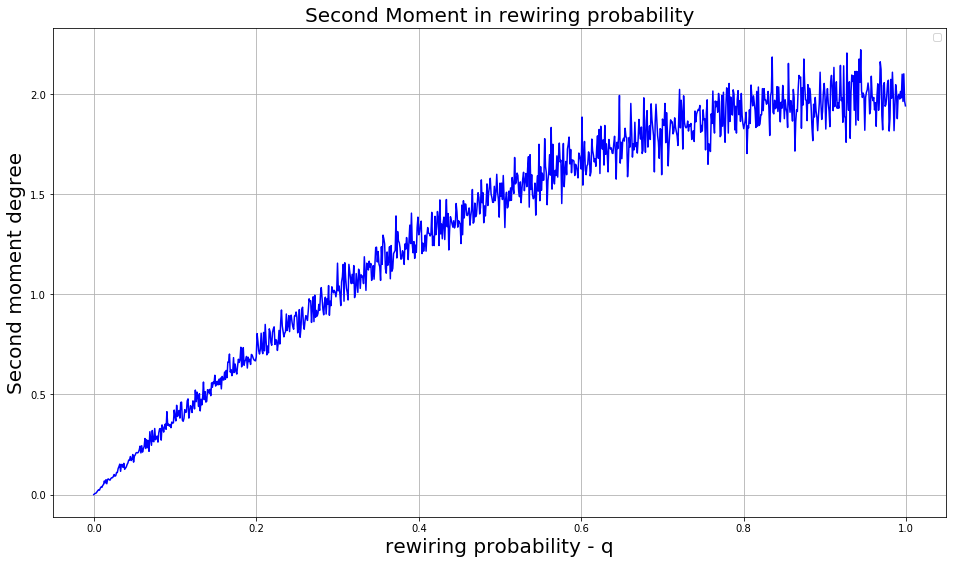

In [22]:
plot_second_moment_rewiring()

In [36]:
N =100
av_degree = 8
k = int(av_degree)
q1 = 0.001
q2 = 0.01
q3 = 0.1
G1 = nx.watts_strogatz_graph(N, k, q1, seed=None)
G2 = nx.watts_strogatz_graph(N, k, q2, seed=None)
G3 = nx.watts_strogatz_graph(N, k, q3, seed=None)
k, pk, grau1 = degree_distribution(G1)
k, pk, grau2 = degree_distribution(G2)
k, pk, grau3 = degree_distribution(G3)

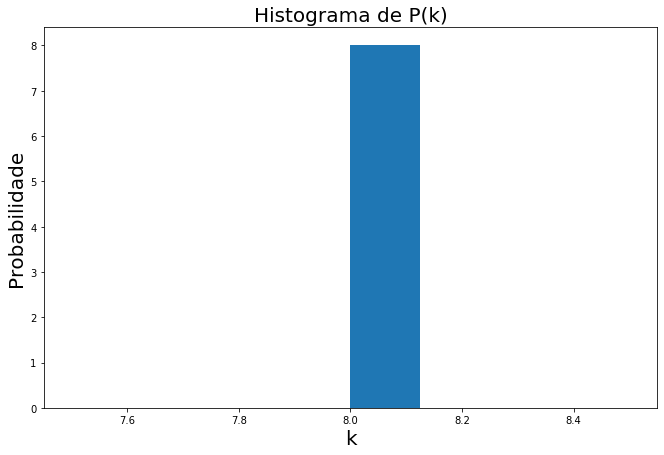

In [37]:
plog_histograma(grau1)

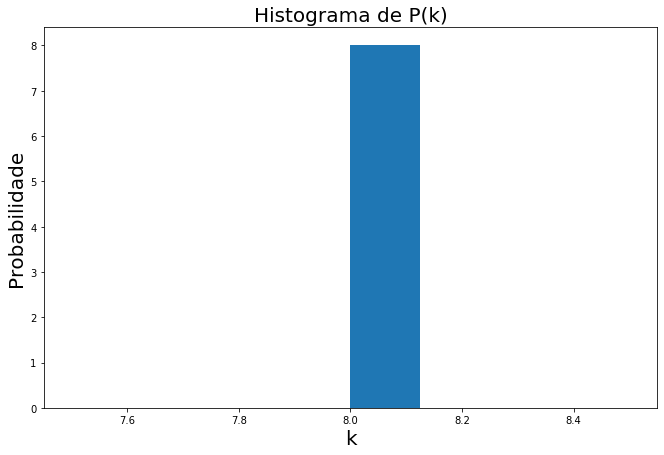

In [38]:
plog_histograma(grau2)

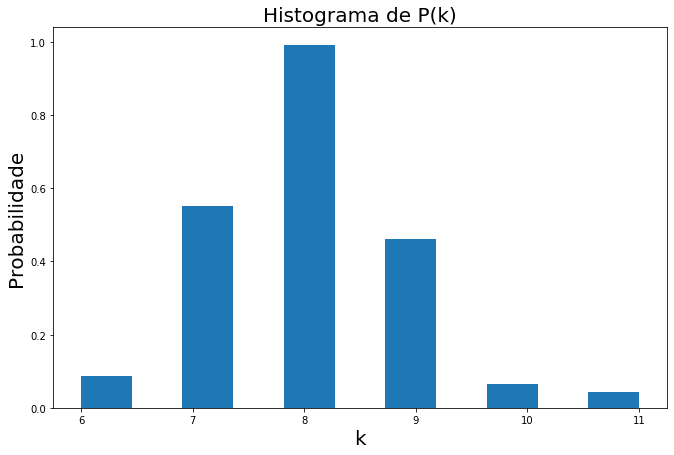

In [39]:
plog_histograma(grau3)

In [84]:
def plot_rewiring_nodes(k,q):
    medida = []
    Nodes = []
    for N in np.arange(20, 500, 10): #q is the rewiring probability
        G = nx.watts_strogatz_graph(N, k, q, seed=None)
        d =nx.diameter(G)
        medida.append(d)
        Nodes.append(N)
    return medida, Nodes
    

In [85]:
def plot_rewiring_variation(p0,p1,p2,p3,p4, n):
    plt.figure(figsize=(16,9))
    plt.loglog(n,p0,'c',basex=10,basey=10, label='p=0')
    plt.loglog(n,p1,'b',basex=10,basey=10, label='p=0.001')
    plt.loglog(n,p2,'r',basex=10,basey=10, label='p=0.01')
    plt.loglog(n,p3,'o',basex=10,basey=10, label='p=0.1')
    plt.loglog(n,p4,'yellow',basex=10,basey=10, label='p=1')
    plt.xlabel("Nodes - N", fontsize=20)
    plt.ylabel("Diameter - <D>", fontsize=20)
    plt.title("Diameter vs Nodes in tendência the  rewiring probability", fontsize=20)
    plt.legend()
    plt.grid(True)
    plt.savefig('WS.eps') #save the figure into a file
    plt.show();

In [86]:
p0, n = plot_rewiring_nodes(10,0)

In [87]:
p1, n = plot_rewiring_nodes(10,0.001)

In [88]:
p2, n = plot_rewiring_nodes(10,0.01)

In [89]:
p3, n = plot_rewiring_nodes(10,0.1)

In [90]:
p4, n = plot_rewiring_nodes(10,1)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


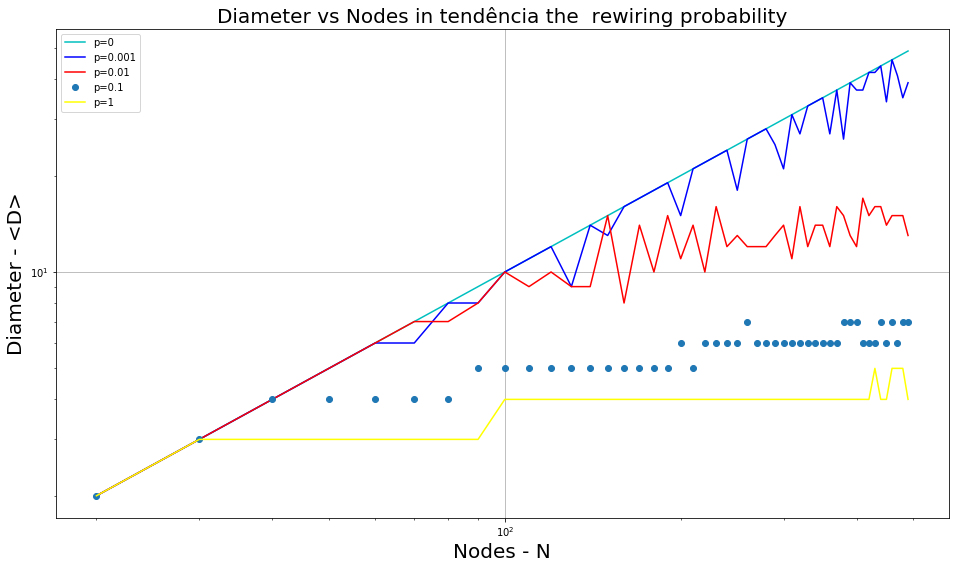

In [91]:
plot_rewiring_variation(p0,p1,p2,p3,p4, n)

## Questão 4

In [24]:
def momment_of_degree_distribution(G,m):
    M = 0
    N = len(G)
    for i in G.nodes:
        M = M + G.degree(i)**m
    M = M/N
    return M

In [95]:
N = 100
av_degree = 8
m = int(av_degree/2)
GBA = nx.barabasi_albert_graph(N, m)
#random gamma para configuração
seg = np.round(np.random.gamma(3, 1, N)).astype(int)

if(sum(seg)%2 != 0): # the sum of stubs have to be even
    pos = np.random.randint(0, len(seg))
    seg[pos] = seg[pos]+ 1
    
GCM=nx.configuration_model(seg, create_using=nx.Graph())

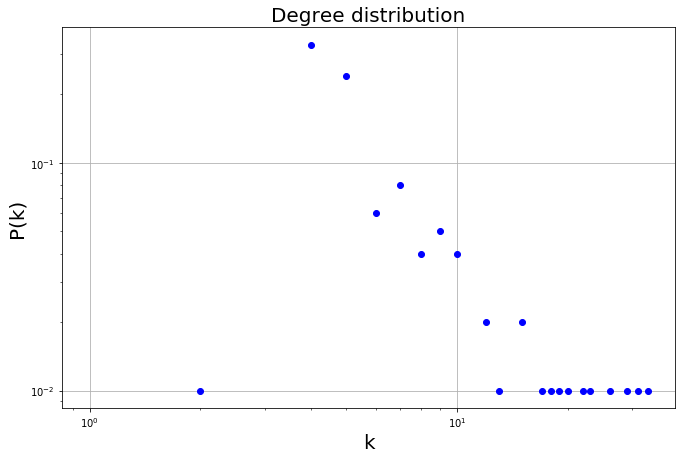

In [96]:
k,pk, grau =degree_distribution(GBA)
plog_scatter_log_log(k,pk)

In [157]:
BA_nodes = len(GBA)

In [158]:
BA_edges = GBA.number_of_edges()

In [159]:
d = dict(GBA.degree()) #discionario de grau por no
d = list(d.values()) #passando para lista apenas com os graus
d = np.mean(d)      #media do grau
BA_average_degree = d

In [160]:
BA_second_moment_degree = momment_of_degree_distribution(GBA, 2)

In [161]:
average_shortest_component = []
if(nx.is_connected(GBA)):
    BA_average_shortest_path = nx.average_shortest_path_length(GBA)
else:
    for g in nx.connected_component_subgraphs(GBA[i]):
        average_shortest_component.append(nx.average_shortest_path_length(g))
    BA_average_shortest_path = np.mean(average_shortest_component)

In [162]:
BA_average_clustering =  nx.average_clustering(GBA)

In [163]:
BA_transitivity = nx.transitivity(GBA)

In [164]:
BA_assortativity = nx.degree_pearson_correlation_coefficient(GBA)

In [165]:
GCM_nodes = len(GCM)

In [166]:
GCM_edges = GCM.number_of_edges()

In [167]:
d = dict(GCM.degree()) #discionario de grau por no
d = list(d.values()) #passando para lista apenas com os graus
d = np.mean(d)      #media do grau
GCM_average_degree = d

In [168]:
GCM_second_moment_degree = momment_of_degree_distribution(GCM,2)

In [169]:
average_shortest_component = []
if(nx.is_connected(GCM)):
    GCM_average_shortest_path = nx.average_shortest_path_length(GCM)
else:
    for g in nx.connected_component_subgraphs(GCM):
        average_shortest_component.append(nx.average_shortest_path_length(g))
    GCM_average_shortest_path = np.mean(average_shortest_component)

In [170]:
GCM_average_clustering =  nx.average_clustering(GCM)

In [171]:
GCM_transitivity = nx.transitivity(GCM)

In [172]:
GCM_assortativity = nx.degree_pearson_correlation_coefficient(GCM)

In [173]:
data_GBA = [BA_nodes, BA_edges, BA_average_degree, BA_second_moment_degree, BA_average_shortest_path, BA_average_clustering, BA_transitivity, BA_assortativity]

In [174]:
data_GCM = [GCM_nodes, GCM_edges, GCM_average_degree, GCM_second_moment_degree, GCM_average_shortest_path, GCM_average_clustering, GCM_transitivity, GCM_assortativity]

In [175]:
data = [data_GBA, data_GCM] 

In [176]:
rotulo_GBA = ["Number of nodes","Number od Edges","Average Degree","Second Moment od Degree","Average Shortest Path Lenght","Average Clustering","Transitivity","Assortativity"] 

In [177]:
index = ["Barabasis-Albert","Configuration Model"]

In [178]:
Rede_GBA = pd.DataFrame(data, columns=rotulo_GBA, index = index)

In [179]:
Rede_GBA

,Number of nodes,Number od Edges,Average Degree,Second Moment od Degree,Average Shortest Path Lenght,Average Clustering,Transitivity,Assortativity
Barabasis-Albert,100,384,7.68,96.62,2.348485,0.231386,0.136272,-0.183687
Configuration Model,100,151,3.02,11.62,0.893798,0.005381,0.014085,-0.025254


In [198]:
def medidas(graphs):  
    data = []
    for g in graphs:
        medidas = []
        g_nodes = len(g)
        medidas.append(g_nodes)

        g_edges = g.number_of_edges()
        medidas.append(g_edges)

        d = dict(g.degree()) #discionario de grau por no
        d = list(d.values()) #passando para lista apenas com os graus
        d = np.mean(d)      #media do grau
        g_average_degree = d
        medidas.append(g_average_degree)

        g_second_moment_degree = momment_of_degree_distribution(g, 2)
        medidas.append(g_second_moment_degree)

        average_shortest_component = []
        if(nx.is_connected(g)):
            g_average_shortest_path = nx.average_shortest_path_length(g)
            medidas.append(g_average_shortest_path)
        else:
            for x in nx.connected_component_subgraphs(g):
                average_shortest_component.append(nx.average_shortest_path_length(x))
            g_average_shortest_path = np.mean(average_shortest_component)
            medidas.append(g_average_shortest_path)

        g_average_clustering =  nx.average_clustering(g)
        medidas.append(g_average_clustering)

        g_transitivity = nx.transitivity(g)
        medidas.append(g_transitivity)

        g_assortativity = nx.degree_pearson_correlation_coefficient(g)
        medidas.append(g_assortativity)
        data.append(medidas)

    rotulo_GBA = ["Number of nodes","Number od Edges","Average Degree","Second Moment od Degree","Average Shortest Path Lenght","Average Clustering","Transitivity","Assortativity"] 

    index = ["CM(a = 0.5)","CM(a = 1)","CM(a = 1.5)","CM(a = 2.5)"]

    Redes = pd.DataFrame(data, columns=rotulo_GBA, index = index)
    
    return Redes

In [199]:
N = 1000
graphs = []
alphas = [0.5, 1, 1.5, 2.5]
for a in alphas:    
    seq = np.round(np.random.gamma(a, 1, N)).astype(int)

    if(sum(seq)%2 != 0): # the sum of stubs have to be even
        pos = np.random.randint(0, len(seq))
        seq[pos] = seq[pos]+ 1

    GCM=nx.configuration_model(seq, create_using=nx.Graph())
    graphs.append(GCM)

In [200]:
redes = medidas(graphs)


In [201]:
redes

,Number of nodes,Number od Edges,Average Degree,Second Moment od Degree,Average Shortest Path Lenght,Average Clustering,Transitivity,Assortativity
CM(a = 0.5),1000,219,0.438,0.774,0.163276,0.000000,0.000000,-0.062169
CM(a = 1),1000,475,0.950,2.080,0.344725,0.001148,0.005310,0.036386
CM(a = 1.5),1000,737,1.474,3.664,0.403350,0.001500,0.002740,0.000768
CM(a = 2.5),1000,1231,2.462,8.472,0.538894,0.000250,0.001001,0.019544


## Questão 5

In [10]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [26]:
def medidas(graphs, label):  
    data = []
    for g in graphs:
        medidas = []
        g_nodes = len(g)
        medidas.append(g_nodes)

        g_edges = g.number_of_edges()
        medidas.append(g_edges)

        d = dict(g.degree()) #discionario de grau por no
        d = list(d.values()) #passando para lista apenas com os graus
        d = np.mean(d)      #media do grau
        g_average_degree = d
        medidas.append(g_average_degree)

        g_second_moment_degree = momment_of_degree_distribution(g, 2)
        medidas.append(g_second_moment_degree)

        average_shortest_component = []
        if(nx.is_connected(g)):
            g_average_shortest_path = nx.average_shortest_path_length(g)
            medidas.append(g_average_shortest_path)
        else:
            for x in nx.connected_component_subgraphs(g):
                average_shortest_component.append(nx.average_shortest_path_length(x))
            g_average_shortest_path = np.mean(average_shortest_component)
            medidas.append(g_average_shortest_path)

        g_average_clustering =  nx.average_clustering(g)
        medidas.append(g_average_clustering)

        g_transitivity = nx.transitivity(g)
        medidas.append(g_transitivity)

        g_assortativity = nx.degree_assortativity_coefficient(g)
        if(np.isnan(g_assortativity)): g_assortativity = 0
        medidas.append(g_assortativity)
        print(g_assortativity)
        data.append(medidas)

    rotulo_GBA = ["Number of nodes","Number od Edges","Average Degree","Second Moment od Degree","Average Shortest Path Lenght","Average Clustering","Transitivity","Assortativity"] 

    Redes = pd.DataFrame(data, columns=rotulo_GBA, index = label)
    
    return Redes

In [12]:
label = []

In [13]:
road = nx.read_weighted_edgelist("euroroad.txt", nodetype=int , comments  = "%")

road = nx.to_undirected(road)

road = max(nx.connected_component_subgraphs(road), key=len)
label.append("Road")
N = len(road)
vk = dict(road.degree())
vk = list(vk.values())

degree = np.round(sum(vk)/N).astype(int)

In [14]:
GER = []
GBA = []
GWS = []

In [17]:
for i in range(10):
    GBA.append(nx.barabasi_albert_graph(N, degree))
    label.append("BA")

In [18]:
for i in range(10):
    GER.append(nx.gnp_random_graph(N, degree))
    label.append("ER")

In [20]:
for i in range(10):
    #variando proporcionamente o probabilidade de religação das arrstas
    if(i < 3): p = 0.001
    elif (i < 6): p = 0.01
    else: p = 0.1
    GWS.append(nx.watts_strogatz_graph(N, degree, p))
    label.append("BA")

In [21]:
redes = [road] + GBA + GER + GWS

In [27]:
medidas = medidas(redes, label)

-0.11166300173840187
-0.11425737723991494
-0.135565616200649
-0.13241730404979943
-0.11439493361246772
-0.131008295726998
-0.13523873788184806
-0.12153054280075587
-0.13882007224781404
-0.12398526290658346
-0.11956589663815707
0
0
0
0
0
0
0
0
0
0
-1.5259021896696422e-05
-1.5259021896696422e-05
-0.01565599536118656
-0.009675232636963087
-0.011354372521280985
-0.023652004795191646
0.006206884164850021
-0.006660442036332093
-0.029825518623418062
-0.01956296848541591


In [ ]:
medidas

In [ ]:

rotulo_GBA = ["Number of nodes","Number od Edges","Average Degree","Second Moment od Degree","Average Shortest Path Lenght","Average Clustering","Transitivity","Assortativity"] 


#Separating features from label
X = medidas.loc[:, rotulo_GBA].values
y = medidas.index

#reduzindo a dimensão
x = StandardScaler().fit_transform(X)



pca = PCA(n_components=2)
treinado = pca.fit_transform(x)


In [ ]:
def set_colol(name):
    if name == "ER":
        return 'r'
    elif name == "BA":
        return 'g'
    elif name == "WS":
        return 'b'
    else :
        return 'purple'
    
colors = list(map(set_colol, y))

In [ ]:
plt.scatter(treinado[:,0], treinado[:,1], c=colors, alpha=0.5)
plt.title('PCA for ER, BA and WS Models for the same N and <k>')
plt.xlabel('PrincipalComponent 1')
plt.ylabel('PrincipalComponent 2')

unique_classes = list(unique(y.reshape(1,-1)))
plt.table(cellText=[[x] for x in unique_classes], loc='upper right',
          colWidths=[0.2],rowColours=list(map(get_model_colors, unique_classes)),
          rowLabels=['label%d'%x for x in range(0 ,len(unique_classes))],
          colLabels=['classes'])
plt.show()
